<a href="https://colab.research.google.com/github/Mordy40/CS50/blob/main/Medical_Data_Analyst_Assignment_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import qgrid
import pandas as pd
import ipywidgets as widgets

from more_itertools import first
from collections import OrderedDict
import sqlite3
# qgrid.enable()
display(widgets.HTML("<style>.container { width:95% !important; }</style>"))

HTML(value='<style>.container { width:95% !important; }</style>')

In [4]:
!pip install pandasql
import json
import pandas as pd
import pandasql
from google.colab import output
output.clear()

In [5]:
!add-apt-repository -y ppa:sergey-dryabzhinsky/packages
!apt update
!apt install sqlite3

Repository: 'deb https://ppa.launchpadcontent.net/sergey-dryabzhinsky/packages/ubuntu/ jammy main'
Description:
Some packages that absent in main Ubuntu repos or backported:
- opensslXXXr - for php-mod-openssl different versions
- libvpx1 (xenial) - for php-5.4
- mysql-5.5 (xenial) - libmysqlclient16 for php 4.4-5.4
- pcre3 - for php, build without stack recursion
- geoip-database - full set of latest GeoIP-lite v1 databases

== Attention! ==

@2022-05-18
Soon most of backported libraries will be moved to `backports` ppa.
And this and other PPAs will depend on `backports`.

@2019-05-28
Updated symbols in libssl102r!
Dependant packages may fail to run!
Wait till these packages will be rebuilded: php54, php55, php56, php-mod-mongodb, php7-mod-stomp.

@2019-05
Precise packages removed.

@2017-05
Beware! Precise is obsolete and packages will not be updated!
For Precise packages follow https://dryabzhinsky.noip.me/packages/

@2015-05
Beware! Lucid is obsolete and packages will not be update

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
output.clear()

In [7]:
# Constants

## sqlalchemy
SQLITE_ENGINE = sqlite3.connect("/content/nym_codes.sqlite")

## widges
LAYOUT = widgets.Layout(height='250px', width='500px', left='400px')
QUERY_PLACEHOLDER = "Insert query here"

## questions input cache
INPUT_1_A = None
INPUT_1_B = None
INPUT_1_C = None
INPUT_1 = None
INPUT_2 = None
INPUT_3 = None
INPUT_4 = None
INPUT_5 = None
INPUT_6 = None
INPUT_7 = None
INPUT_8 = None
INPUT_BONUS = None

# Utils
def get_query_result(query_text_widget: widgets.Textarea) -> pd.DataFrame:
    if query_text_widget.get_interact_value():
        query = query_text_widget.get_interact_value().replace('/n', ' ')
    else:
        raise ValueError("Please insert a query to execute!")
    try:
        df = pd.read_sql(query, con=SQLITE_ENGINE)
        return df
    except:
        excecute_query = SQLITE_ENGINE.execute(query)
        data = excecute_query.fetchall()
        return pd.DataFrame(data=data, columns=excecute_query.keys())

# SQL Questions

### First get to know nym_codes and external_codes tables
>Query nym_codes charts

>Query external_codes charts

### For those that prefer using Python and pandas, please execute the following cell and utilize the provided table as a DataFrame.

**Panads Data Frames:**

In [8]:
nym_codes_df = pd.read_sql('select * from nym_codes', con=SQLITE_ENGINE)
external_codes_df = pd.read_sql('select * from external_codes', con=SQLITE_ENGINE)

In [9]:
nym_codes_df.head()

,chart_id,nym_cpt_codeset,nym_icd10_codeset,facility,covered,creation_date,failure_reason
0,3298458,"[""99291:CS""]","[""U07.1"", ""J12.82"", ""J45.909"", ""Z87.891"", ""R10...",WAKANDA,yes,2024-01-01 00:00:00,None
1,3298459,"[""99285"", ""93010"", ""99053""]","[""K57.92"", ""I48.0"", ""K76.9"", ""I12.9"", ""N18.2"",...",SAKAAR,yes,2024-01-26 00:00:00,None
2,3298460,"[""99291:CS""]","[""J18.9"", ""I12.9"", ""J96.21"", ""Z87.891"", ""N18.9...",ASGARD,yes,2024-01-07 00:00:00,None
3,3298461,"[""99285"", ""99053""]","[""S02.652A"", ""S60.222A"", ""S60.221A"", ""S09.93XA""]",ASGARD,yes,2024-01-09 00:00:00,None
4,3298462,"[""99285""]","[""U07.1"", ""J12.82"", ""J96.01"", ""G47.33"", ""Q82.5...",SAKAAR,yes,2024-01-18 00:00:00,None


In [10]:
#Checking for null values, and chart size
nym_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766 entries, 0 to 5765
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   chart_id           5766 non-null   int64 
 1   nym_cpt_codeset    5766 non-null   object
 2   nym_icd10_codeset  5766 non-null   object
 3   facility           5766 non-null   object
 4   covered            5766 non-null   object
 5   creation_date      5766 non-null   object
 6   failure_reason     1321 non-null   object
dtypes: int64(1), object(6)
memory usage: 315.5+ KB


In [11]:
#Repeat for external_codes_df
external_codes_df.head()

,chart_id,external_cpt_codeset,external_icd10_codeset
0,3298458,"[""99291:CS""]","[""U07.1"", ""J12.82"", ""E11.65"", ""R10.9"", ""K57.32..."
1,3298459,"[""99285"", ""93010"", ""99053""]","[""I48.0"", ""I12.9"", ""N18.2"", ""K57.92"", ""K76.9"",..."
2,3298460,"[""99291:CS""]","[""A41.9"", ""J96.21"", ""N17.9"", ""I12.9"", ""E11.22""..."
3,3298461,"[""99284"", ""99053""]","[""T74.11XA"", ""S02.652A"", ""S09.90XA"", ""S60.221A..."
4,3298462,"[""99285""]","[""U07.1"", ""J12.82"", ""G47.33"", ""Q82.5"", ""R60.0""..."


In [12]:
external_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766 entries, 0 to 5765
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   chart_id                5766 non-null   int64 
 1   external_cpt_codeset    5766 non-null   object
 2   external_icd10_codeset  5766 non-null   object
dtypes: int64(1), object(2)
memory usage: 135.3+ KB


In [13]:
#Exploring distribution of "covered" charts
nym_codes_df['covered'].value_counts()

,count
covered,
yes,4445
no,915
ignore,406


In [14]:
#Exploring distribution of "facility"
nym_codes_df['facility'].value_counts()

,count
facility,
ASGARD,2751
SAKAAR,1575
WAKANDA,1440


In [36]:
#Exploring distribution of "failure_reason"
nym_codes_df['failure_reason'].value_counts()

,count
failure_reason,
UnsupportedProcedureCode,452
RunTimeFailure,443
ChartMissingCriticalElement,406
SuspectedMissedCriticalCareEMValidation,20


In [15]:
# I'll typecast as datetime object for later filtering and explore min/max for "creation_date",
nym_codes_df['creation_date'] = pd.to_datetime(nym_codes_df['creation_date'])
print(nym_codes_df['creation_date'].dtype)
print(nym_codes_df['creation_date'].min())
print(nym_codes_df['creation_date'].max())

datetime64[ns]
2024-01-01 00:00:00
2024-02-01 00:00:00


**SQLite Widgets:**

In [16]:
know_the_tables = widgets.Textarea(placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
know_the_tables

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

In [17]:
get_query_result(know_the_tables)

,chart_id,nym_cpt_codeset,nym_icd10_codeset,facility,covered,creation_date,failure_reason
0,3298458,"[""99291:CS""]","[""U07.1"", ""J12.82"", ""J45.909"", ""Z87.891"", ""R10...",WAKANDA,yes,2024-01-01 00:00:00,None
1,3298459,"[""99285"", ""93010"", ""99053""]","[""K57.92"", ""I48.0"", ""K76.9"", ""I12.9"", ""N18.2"",...",SAKAAR,yes,2024-01-26 00:00:00,None
2,3298460,"[""99291:CS""]","[""J18.9"", ""I12.9"", ""J96.21"", ""Z87.891"", ""N18.9...",ASGARD,yes,2024-01-07 00:00:00,None
3,3298461,"[""99285"", ""99053""]","[""S02.652A"", ""S60.222A"", ""S60.221A"", ""S09.93XA""]",ASGARD,yes,2024-01-09 00:00:00,None
4,3298462,"[""99285""]","[""U07.1"", ""J12.82"", ""J96.01"", ""G47.33"", ""Q82.5...",SAKAAR,yes,2024-01-18 00:00:00,None


QUESTIONS:

*We advise you to support your answers with explanations* - Good luck!

**1. Calculate coverage percentage per Facility between 1/1/24 to 14/1/24**

In [19]:
question_1_a = widgets.Textarea(value=INPUT_1_A, placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
question_1_a

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

I thought to assign 1,0 values to the "yes"/"no" variable in nym_codes_df['covered'].
However, since there is an "ignore" value, I decided for leave them as is, and assign values within SQL queries instead


1. create actual_coverage by dividing covered = 'yes by total charts. A value of 1.0 (and not 1) is given to 'yes' answers creating a float, and multiplying by 100 makes it a percentage, which then gets rounded to 2 decimal points.
2. Group the actual_coverage variable by facility.
3. Ordered by highest to lowest coverage

In [20]:
INPUT_1_A = question_1_a.get_interact_value()
get_query_result(question_1_a)

,facility,actual_coverage
0,ASGARD,83.61
1,WAKANDA,72.64
2,SAKAAR,69.78


In [21]:
question_1_b = widgets.Textarea(value=INPUT_1_B, placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
question_1_b

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

1. Create contractual_coverage by dividing covered = "yes" by covered = "yes" + covered = "no"


NOTE: using a denominator of count(*) - covered = 'ignore' resulted in negative values, so I switched to the current script.

In [22]:
INPUT_1_B = question_1_b.get_interact_value()
get_query_result(question_1_b)

,facility,contractural_coverage
0,ASGARD,87.65
1,WAKANDA,79.36
2,SAKAAR,77.50


In [23]:
question_1_c = widgets.Textarea(value=INPUT_1_C, placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
question_1_c

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

Use a "WHERE" clause within the CASE definitioin to filter for CPT procedure 93010

In [24]:
INPUT_1_C = question_1_c.get_interact_value()
get_query_result(question_1_c)

,facility,actual_coverage_93010
0,WAKANDA,21.32
1,SAKAAR,17.40
2,ASGARD,15.16


Bonus - single table

In [25]:
question_1 = widgets.Textarea(value=INPUT_1, placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
question_1

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

In [26]:
INPUT_1 = question_1.get_interact_value()
get_query_result(question_1)

,facility,actual_coverage,contractural_coverage,actual_coverage_93010
0,ASGARD,83.61,87.65,15.16
1,WAKANDA,72.64,79.36,21.32
2,SAKAAR,69.78,77.50,17.40


**2. Get the non-EM CPT codes distribution for Nym covered charts with EM4**

In [27]:
question_2 = widgets.Textarea(value=INPUT_2, placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
question_2

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

Q2 Explanation- From the nym_cpt_codeset of nym_codes where covered = 'yes', and  nym_cpt_codeset includes '99284', access frequency of non-EM codes.

Challenge: The values in nym_cpt_codeset are long strings(JSON arrays), and not seperated values/sets, making comparison difficult without exploding the data ie. create a new row for each value within the string.


1."Explode" the code using JSON which recognizes the string as a JSON array, and makes new rows for each unique value in nym_cpt_codeset, corresponding to each chart_id
2. Filter those new rows INCLUDE only covered = 'yes' rows, and  nym_cpt_codeset includes '99284'
3. Filter to EXCLUDE rows that have any other EM code.
4.GROUP BY remaining CPT codes and their count to display frequency distribution.

In [30]:
INPUT_2 = question_2.get_interact_value()
get_query_result(question_2)

,cpt_code,code_count
0,99053,483
1,99284:CS,211
2,93010,95
3,99284:25,29
4,12013,7
5,12001,7
6,12011,4
7,10061,4
8,29515,3
9,"99284:25,CS",2


**3. Calculate EM accuracy percentage for Nym covered charts**

In [31]:
question_3 = widgets.Textarea(value=INPUT_3, placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
question_3

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

Q3 Explanation: For charts on nym_codes where covered = 'yes, show the percentage(accuracy) of matching the nym_cpt_codeset EM value to the external_cpt_codeset EM value.

Challenge: The cpt_codeset columns are stored as JSON arrays, which are not directly comparable in SQL. To evaluate accuracy, the arrays must be exploded into individual CPT code rows. Additionally, the external CPT codes must be joined from a separate external_codes table and compared to the nym_cpt_codeset predictions chart by chart.



1. JOIN external and nym tables on chart_id to alligng predictions and true values.
2. EXPLODE both cpt_codeset values for the joined chart using json_each to convert JSON arrays into CPT code rows.
3. SELECT the "virtual" CPT codes using the .value field from each exploded virtural table.
4. Filter for covered = 'yes', and for EM codes leaving each chart with 1 EM value per chart from each data source.
5. Filter for exact matching EM codes for both data sources
6. LEFT JOIN matching values to Nym-covered chart to maintain non-matching values
7. Calaculate accuracy by divide correct predictions / total nym predictions






In [32]:
INPUT_3 = question_3.get_interact_value()
get_query_result(question_3)

,em_accuracy_percent
0,57.08


**4. Show the most common EM level mismatch that Nym makes**

In [33]:
question_4 = widgets.Textarea(value=INPUT_4, placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
question_4

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

Q4 **NOTE: For this question I assume that EM level codes are the first 5 EM codes corresponding to medical emergency level 1-5, but I exclude the EM critical care codes.**

1. Join external and nym tables on chart_id
2. Explode nym and external CPT arrays using json_each()
3. JOIN the resulting value tables as nym_code and external_code
4. FIlter for covered = "yes" and the EM levels CPT codes (99281-99285)
5. Filter for mismatched EM level codes preserving only rows where nym_code != external_code
6. GROUP by nym_code and external_code combinations to determine frequency of unique mismatch combinations
7. ORDER by most to least frequent mismatch combiation and LIMIT to 1 result


In [34]:
INPUT_4 = question_4.get_interact_value()
get_query_result(question_4)

,nym_code,external_code,mismatch_count
0,99285,99284,421


**5. What can Nym do to increase coverage? Please show the query and explain your answer.**

In [35]:
question_5 = widgets.Textarea(value=INPUT_5, placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
question_5

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

This script combines a subquery to get coverage_rate per facility and a Main query for failure_reason by facility joined to the coverate_rate.



In [50]:
INPUT_5 = question_5.get_interact_value()
get_query_result(question_5)

,facility,failure_reason,failure_count,coverage_rate
0,ASGARD,RunTimeFailure,162,87.65
1,ASGARD,UnsupportedProcedureCode,152,87.65
2,ASGARD,SuspectedMissedCriticalCareEMValidation,10,87.65
3,SAKAAR,UnsupportedProcedureCode,161,77.50
4,SAKAAR,RunTimeFailure,151,77.50
5,SAKAAR,SuspectedMissedCriticalCareEMValidation,7,77.50
6,WAKANDA,UnsupportedProcedureCode,139,79.36
7,WAKANDA,RunTimeFailure,130,79.36
8,WAKANDA,SuspectedMissedCriticalCareEMValidation,3,79.36


In [ ]:
"""
Put your answer explanation here or in your seperate file:





"""

**6. Research and explain the correlation between CS modifier and ICD codes, use Nym coding results only.**

> Add blockquote



In [51]:
question_6 = widgets.Textarea(value=INPUT_6, placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
question_6

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

In [73]:
INPUT_6 = question_6.get_interact_value()
get_query_result(question_6)

,icd_code,chart_count,percent_of_charts
0,Z20.822,602,86.87
1,Z72.0,132,19.05
2,R50.9,100,14.43
3,R05.9,98,14.14
4,Z87.891,97,14.00
...,...,...,...
380,T81.40XA,1,0.14
381,T88.7XXA,1,0.14
382,Z20.2,1,0.14
383,Z77.22,1,0.14


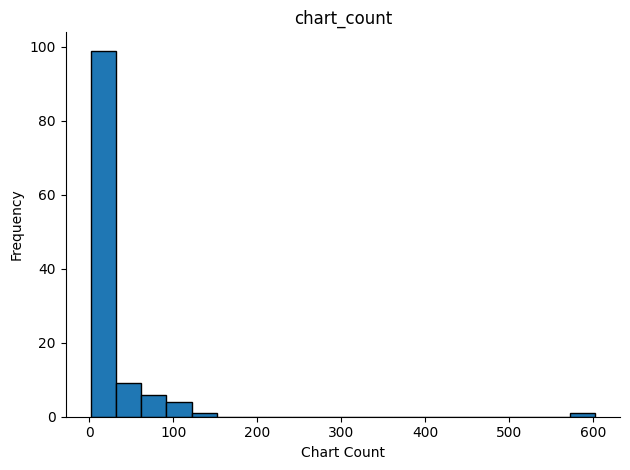

In [74]:
# Plot histogram
_df_16['chart_count'].plot(kind='hist', bins=20, title='chart_count', edgecolor='black')

# Style the plot
plt.xlabel('Chart Count')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

# Save to PNG
plt.savefig('chart_count_histogram.png')

# Show the plot
plt.show()


Bonus - Out of all charts with modifier CS - how many patients were actually diagnosed with the root cause of CS modifier ?

In [63]:
question_bonus = widgets.Textarea(value=INPUT_BONUS, placeholder=QUERY_PLACEHOLDER, layout=LAYOUT)
question_bonus

Textarea(value='', layout=Layout(height='250px', left='400px', width='500px'), placeholder='Insert query here'…

In [75]:
INPUT_BONUS = question_bonus.get_interact_value()
get_query_result(question_bonus)

,cs_charts_with_one_icd,total_cs_charts,percent_with_one_icd
0,5,693,0.72
